<a href="https://colab.research.google.com/github/taesaksit/Plant-Disease-Classification/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Check version
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.15.0
2.15.0


In [33]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn.model_selection import train_test_split


np.set_printoptions(suppress=True)

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:

def load_data(name , label):
    return  pickle.load(open(name,'rb')) , pickle.load(open(label,'rb'))

def split_data(X,y):
    X_train , X_test , y_train , y_test = train_test_split(np.array(X) , np.array(y) , test_size=0.2)
    return X_train , X_test , y_train , y_test


def visual_graph(history):

    plt.figure(figsize=(12,5.5))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],color='b',label='Training')
    plt.plot(history.history['val_loss'],color='r',label='val_Training')
    plt.title('Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],color='b',label='Training')
    plt.plot(history.history['val_accuracy'],color='r',label='val_Training')
    plt.title('Accuracy')
    plt.legend()
    plt.grid()
    return

def visulize_confusion(model , X_test , y_test , class_name):
    # y_pred = np.where(model.predict(X_test) >0.5 , 1,0)
    y_pred = np.argmax(model.predict(X_test) , axis=1)
    cm = confusion_matrix(y_test , y_pred)

    plt.figure(figsize=(9, 7))

    # Create the confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_name)

    # Plot the confusion matrix
    disp.plot(cmap='viridis', ax=plt.gca())

    # Make the labels italic and rotated
    plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right", fontstyle='italic')
    plt.setp(plt.gca().get_yticklabels(), fontstyle='italic')

    # Display the plot
    plt.show()


def evaluate_model(model , X_tset , y_test):
  loss , accuracy = model.evaluate(X_test , y_test)
  print('loss:',loss )
  print('Accuracy: ',accuracy)

def save_model(model):
    return model.save('./model_disease.h5')

# วิธีเขียนแบบทั่วไป #
global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()
average_pooling = global_average_pooling_layer(base_model.output)

# วิธีเขียนแบบ chain #
average_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [43]:
# Load base model
def train(X_train , y_train , X_test , y_test):
    base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3) ,
                                                   include_top=False,
                                                   weights='imagenet')
    base_model.trainable = False

    # Flatten layer
    average_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    # Output layer
    prediction_layer = tf.keras.layers.Dense(units=4 , activation='softmax')(average_pooling)
    # Custom head
    model = tf.keras.models.Model(inputs=base_model.input , outputs=prediction_layer)

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train , y_train , validation_data=(X_test , y_test),
                        batch_size=128,
                        verbose=1,
                        epochs=50)
    return history , model

In [46]:
# Main call function
path_feature = '/content/drive/MyDrive/Project/data/feature_rgb.pickle'
path_label = '/content/drive/MyDrive/Project/data/label_rgb.pickle'
X , y = load_data(path_feature , path_label)
X_train , X_test , y_train , y_test = split_data(X,y)

history , model = train(X_train , y_train , X_test , y_test)

Epoch 1/50
26/26 [==============================] - 7s 120ms/step - loss: 1.6182 - accuracy: 0.2739 - val_loss: 1.3364 - val_accuracy: 0.3887
Epoch 2/50
26/26 [==============================] - 2s 71ms/step - loss: 1.2160 - accuracy: 0.4617 - val_loss: 1.0658 - val_accuracy: 0.5621
Epoch 3/50
26/26 [==============================] - 2s 70ms/step - loss: 0.9782 - accuracy: 0.6134 - val_loss: 0.8612 - val_accuracy: 0.6728
Epoch 4/50
26/26 [==============================] - 2s 69ms/step - loss: 0.7945 - accuracy: 0.7079 - val_loss: 0.7069 - val_accuracy: 0.7651
Epoch 5/50
26/26 [==============================] - 2s 70ms/step - loss: 0.6527 - accuracy: 0.7898 - val_loss: 0.5853 - val_accuracy: 0.8192
Epoch 6/50
26/26 [==============================] - 2s 77ms/step - loss: 0.5448 - accuracy: 0.8427 - val_loss: 0.4920 - val_accuracy: 0.8610
Epoch 7/50
26/26 [==============================] - 2s 84ms/step - loss: 0.4614 - accuracy: 0.8720 - val_loss: 0.4201 - val_accuracy: 0.8844
Epoch 8/50
2

26/26 [==============================] - 2s 19ms/step


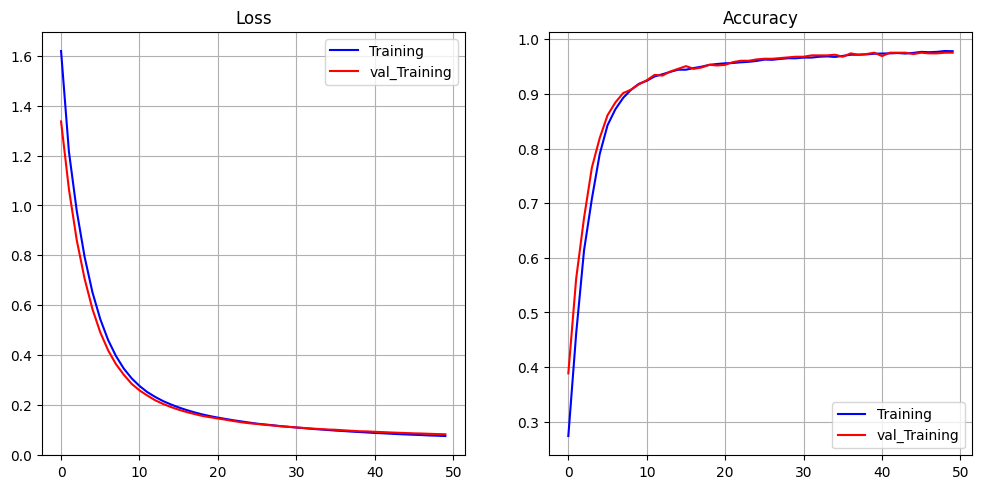

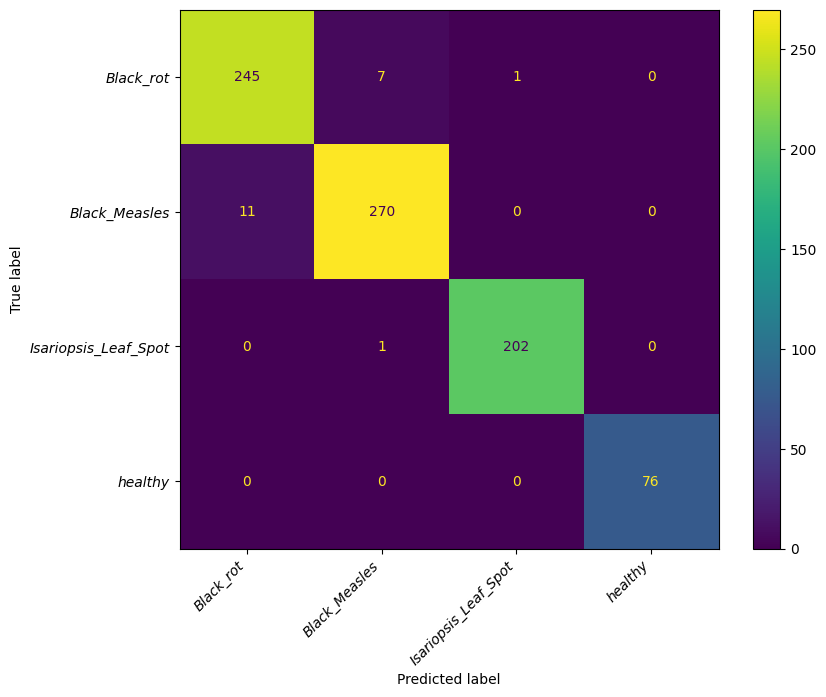

In [47]:
display_labels=['Black_rot','Black_Measles','Isariopsis_Leaf_Spot','healthy']
visual_graph(history)
visulize_confusion(model , X_test , y_test,display_labels)



In [48]:
evaluate_model(model , X_test , y_test)

26/26 [==============================] - 0s 17ms/step - loss: 0.0840 - accuracy: 0.9754
loss: 0.08404049277305603
Accuracy:  0.9753997325897217


In [51]:
save_model(model)

In [50]:
model  = load_model('/content/model_disease.h5')
model.summary()